# Network Optimisation

In this notebook, we will perform network analysis on real data. First, we will load and analyse the degree of ATCO Network data for the datasets *ATCOGas Existing* and *ATCOGas Proposed Main*. However, given our time and computational resources restrictions, we will explore other real-world datasets to illustrate the network properties.


**Summary**
  - [ATCO Dataset](#ATCO)
      - [Network Properties](#atcoProp)
         - [Degree Distribution](#degreeATCO)
         - [Visualising the Degree Distribution](#visATCO)     
  - [Distribution Power Line Dataset](#dpl)
     - [Network Properties](#dplProp)
         - [Degree Distribution](#degreedpl)
         - [Visualising the Degree Distribution](#visdpl)
  - [Transmission Overhead Powerline](#tran)
     - [Graph Drawing](#draw)
     - [Network Properties](#tranProp)
         - [Betweeness](#bettran)
         - [Closeness](#cltran)

In [1]:
import networkx as nx # package for the creation, manipulation, and study of the structure, 
                      # dynamics, and functions of complex networks
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # plot nicely =)

#sns.set()

%matplotlib inline

## ATCO Dataset
<a id='ATCO'></a>

**Summary**
 - [Loading the Dataset](#loadATCO)
 - [Network Properties](#atcoProp)
     - [Degree Distribution](#degreeATCO)
     - [Visualising the Degree Distribution](#visATCO)
 

### Loading the Dataset
<a id='loadATCO'></a>

Here, we are going to use the Python package [NetworkX](https://networkx.github.io/), which is a well-known python package for a very comprehensive complex network analysis. As our dataset was created by using [GDAL - Geospatial Data Abstraction Library](https://www.gdal.org/) - a translator library for raster and vector geospatial data formats, we will need the function [read_shp](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.readwrite.nx_shp.read_shp.html) from the **networkx** to load the data.

**<font color='red'>Warning:</font> If you got the following error message:**
```python
     94     shp = ogr.Open(path)
     95     if shp is None:
---> 96         raise RuntimeError("Unable to open {}".format(path))
     97     for lyr in shp:
     98         fields = [x.GetName() for x in lyr.schema]

RuntimeError: Unable to open ATCOGas_Existing_Main.shp
```
**this happens because the file with extension .shp requires other companion files: .dbf, .shx, .prj etc... ([stackexchange](https://gis.stackexchange.com/questions/262505/python-cant-read-shapefile)). <font color='red'>Note: </font>make sure that you have all the data to load your network.**

In [2]:
# Let's create the network, read_shp function will read the data and store it nicely in a graph
# structure, read the documentation for more information. This will take a while!!!!

# Creating the network for ATCOGas Existing Main
G1=nx.read_shp("../data/ATCO Network/ATCOGas_Existing_Main.shp")
# Creating the network for ATCOGas Proposed Main
G2=nx.read_shp("../data/ATCO Network/ATCOGas_Proposed_Main.shp")

### Network Properties
<a id='atcoProp'></a>

The package **networkx** provides many functions and algorithms for analysing the properties of the networks. Have a look [here](https://networkx.github.io/documentation/stable/reference/algorithms/index.html) for a comprehensive list.

#### Degree Distribution
<a id='degreeATCO'></a>

The **node degree** is the number of edges connected to the node (number of neighbours of the node). The **weighted node degree** ponders the number of connections by the weight of each edge. The **degree distribution** gives the probability of each degree when we consider the entire network. 

In order to computer the degree distribution of both networks we are going to use the function [degree](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.degree.html) from networkx and sort the degree in descending order by using the python function [sorted](https://www.w3schools.com/python/ref_func_sorted.asp).

In [3]:
#compute and plot the degree distribution
# ATCOGas Existing Main
degree_dst1 = sorted([d for n, d in G1.degree()], reverse=True)
# ATCOGas Proposed Main
degree_dst2 = sorted([d for n, d in G2.degree()], reverse=True)

#### Visualising the Degree Distribution
<a id='visATCO'></a>

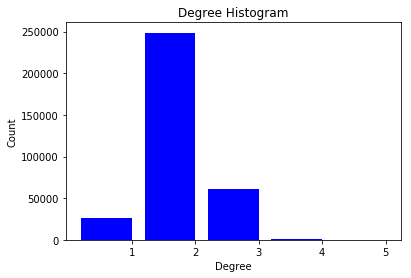

In [4]:
import collections

def plot_degree_histogram(degree_seq):
    #From networkx (https://networkx.github.io/documentation/stable/auto_examples/drawing/plot_degree_histogram.html):
    degreeCount = collections.Counter(degree_seq)
    deg, cnt = zip(*degreeCount.items())

    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.xticks([d + 0.4 for d in deg], deg)
    
plot_degree_histogram(degree_dst1)

Text(0.5,0,'rank')

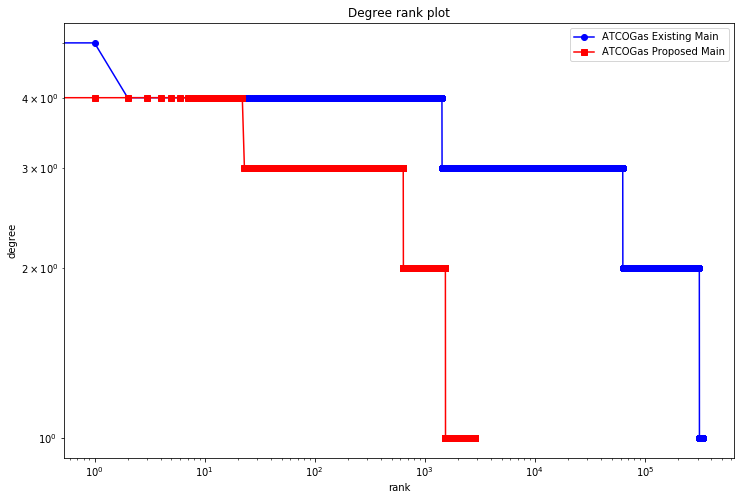

In [5]:
plt.figure(figsize = (12,8))

_ = plt.loglog(degree_dst1, 'b-', marker='o', 
                      label='ATCOGas Existing Main')
_ = plt.loglog(degree_dst2, 'r-', marker='s', 
                      label='ATCOGas Proposed Main')

plt.legend()

plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

**Question**: What we can infer by visualizing the degree distribution of both networks?

## Distribution Power Line Dataset
<a id='dpl'></a> 

**Summary**
 - [Loading the Dataset](#loaddpl)
 - [Network Properties](#dplProp)
     - [Degree Distribution](#degreedpl)
     - [Visualising the Degree Distribution](#visdpl)

### Loading the Dataset
<a id='loaddpl'></a>

In [6]:
#move on to a smaller data set
Gdpl=nx.read_shp("../data/DistributionPowerlineOH/DistributionPowerlineOH.shp")

### Network Properties
<a id='dplProp'></a>

#### Degree Distribution
<a id='degreedpl'></a>

In [7]:
degree_dpl = sorted([d for n, d in Gdpl.degree()], reverse=True)
print('Max degree: {}'.format(max(degree_dpl)))

Max degree: 5


#### Visualising the Degree Distribution
<a id='visdpl'></a>

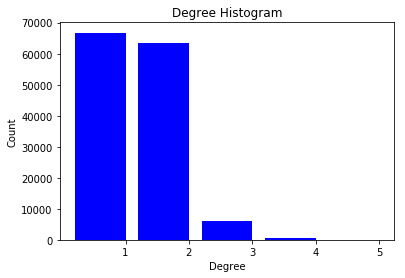

In [8]:
plot_degree_histogram(degree_dpl)

Text(0.5,0,'rank')

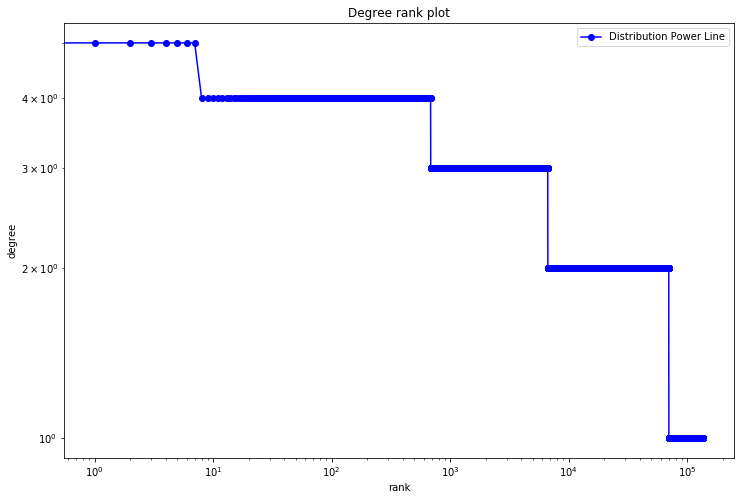

In [9]:
plt.figure(figsize = (12,8))

_ = plt.loglog(degree_dpl, 'b-', marker='o', 
               label='Distribution Power Line')

plt.legend()
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("rank")

## Transmission Overhead Powerline
<a id='tran'></a>

Let's move to a smaller network so that we can better visualize it. Here we use the Transmission Overhead Powerline dataset.

**Summary**
 - [Loading the Dataset](#loadtran)
 - [Graph Drawing](#draw)
 - [Network Properties](#tranProp)
     - [Betweeness](#bettran)
     - [Closeness](#cltran)

### Loading the Dataset
<a id='loadtran'></a>

In [10]:
Gtran = nx.read_shp("../data/TransmissionOverheadPowerlinesWP_032/TransmissionOverheadPowerlinesWP_032.shp")

### Graph Drawing
<a id='draw'></a>

Let's first visualize how the network looks like. We will use the [Fruchterman-Reingold force-directed algorithm](https://en.wikipedia.org/wiki/Force-directed_graph_drawing). To compute the ($x$,$y$) positions of the note and we will use the function [spring_layout](https://networkx.github.io/documentation/latest/reference/generated/networkx.drawing.layout.spring_layout.html#networkx.drawing.layout.spring_layout) and them [draw](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) to plot the graph. Both functions are from networkx.

In [11]:
pos = nx.spring_layout(Gtran, iterations=200)

<IPython.core.display.Javascript object>


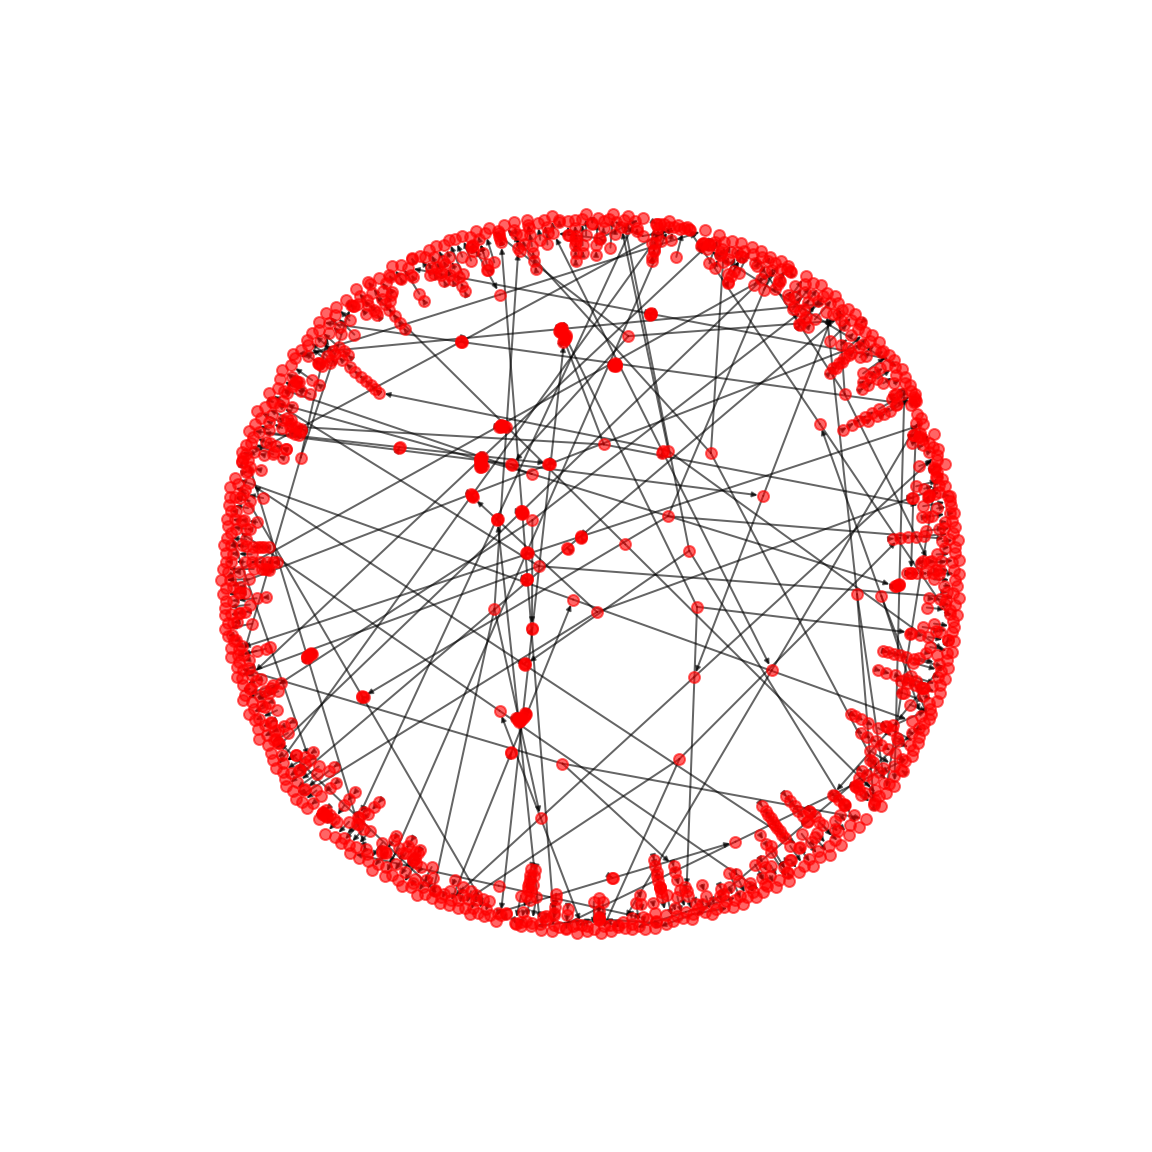

In [13]:
#sometimes you need to run this many times to see the figure 
%matplotlib notebook 

plt.figure(figsize=(8,8))
plt.axis('off')
nx.draw(Gtran, pos, node_size=30,  width=1, alpha=0.6, arrowsize=5)

**Note:** You can select and zoom parts of the network above to see it in more details.

Let's now visualise the top 25 connected subgraphs. We are going to use the function [to_undirected](https://networkx.github.io/documentation/latest/reference/generated/networkx.classes.function.to_undirected.html?highlight=to_undirected#networkx.classes.function.to_undirected) to get the undirected (edges with no direction) view of the graph and then apply the function [connected_component_subgraphs](https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.components.connected_component_subgraphs.html?highlight=connected_component_subgraphs#networkx.algorithms.components.connected_component_subgraphs) to get the connected subgraphs.

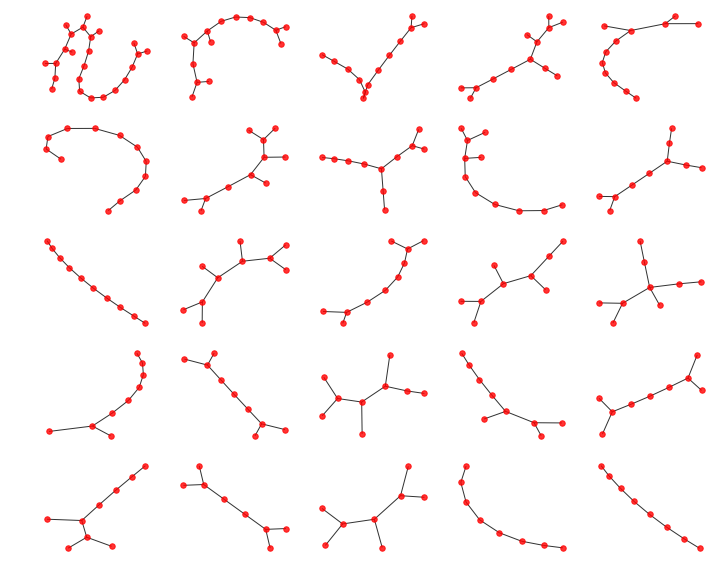

In [14]:
%matplotlib inline

plt.figure(figsize=(12, 10))
H = Gtran.to_undirected()
for i in range(1, 26):
    plt.subplot(5, 5, i)
    
    Gcc = sorted(nx.connected_component_subgraphs(H), key=len, reverse=True)[i]
    pos = nx.spring_layout(Gcc)
    plt.axis('off')
    nx.draw(Gcc, pos, node_size=30, node_color='r', width=1, alpha=0.8)

plt.show()

Let's compute and visualise the minimum spanning tree by using the function [minimum_spanning_tree](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.mst.minimum_spanning_tree.html#networkx.algorithms.mst.minimum_spanning_tree) from networkx.

[From wikipedia](https://en.wikipedia.org/wiki/Minimum_spanning_tree): *"A minimum spanning tree (MST) or minimum weight spanning tree is a subset of the edges of a connected, edge-weighted (un)directed graph that connects all the vertices together, without any cycles and with the minimum possible total edge weight. That is, it is a spanning tree whose sum of edge weights is as small as possible. More generally, any edge-weighted undirected graph (not necessarily connected) has a minimum spanning forest, which is a union of the minimum spanning trees for its connected components..."*

In [15]:
T = nx.minimum_spanning_tree(H)
pos = nx.spring_layout(T, iterations=200)

Again, try to zoom parts of the network to have a look at the trees which were found by the algorithm. 

<IPython.core.display.Javascript object>


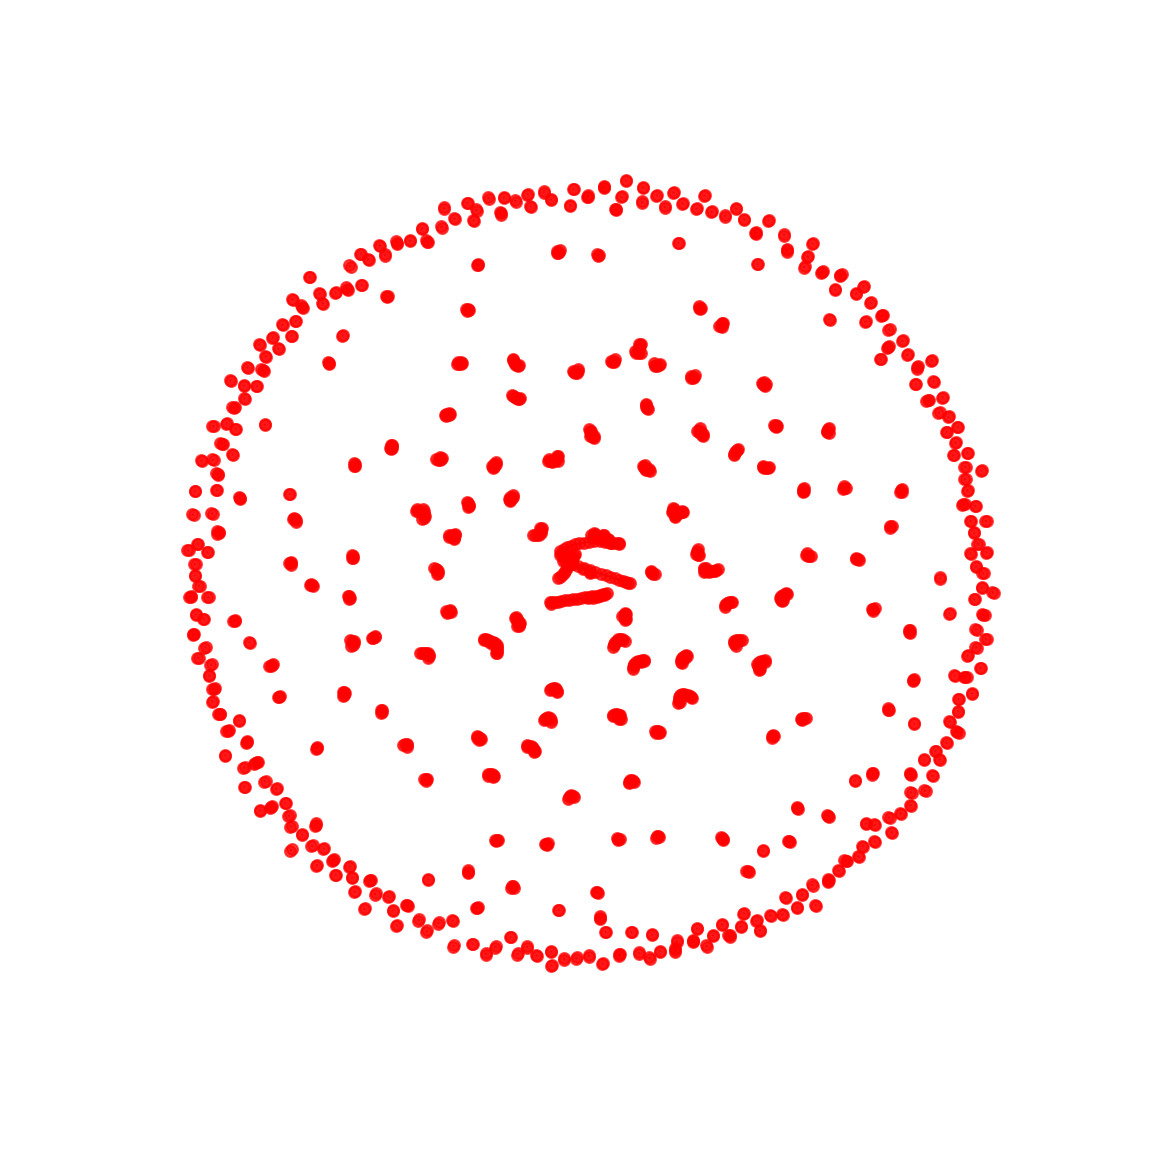

In [16]:
%matplotlib notebook

plt.figure(figsize=(8,8))
plt.axis('off')
nx.draw(T, pos, node_size=30,  width=1, alpha=0.7)

### Network Properties
<a id='tranProp'></a>

Now we propose that you try to get some of the network properties for the Transmission Overhead Powerline dataset.

**Exercise**: Compute and plot the degree distribution.

In [ ]:
# compute here the degree distribution

In [ ]:
# plot here the degree distribution

### Betweenness
<a id='bettran'></a>

From networkx: *Betweenness centrality of a node $v$ is the sum of the fraction of all-pairs shortest paths that pass through $v$,*

$$C_B(v) = \sum_{s,t \in V}\frac{\sigma(s,t|v)}{\sigma(s,t)}$$
*where $V$ is the set of nodes, $\sigma(s,t)$ is the number of shortest $(s,t)$-paths and $\sigma(s,t|v)$ is the number of those paths passing through some node $v$ other than $s,t$.*

We will use the function [betweenness_centrality
](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality) from networkx.

In [17]:
cb_tran = nx.betweenness_centrality(Gtran)

Run the code below to visualise the distribution of the betweenness centrality for each node.

Text(0,0.5,'Probability')

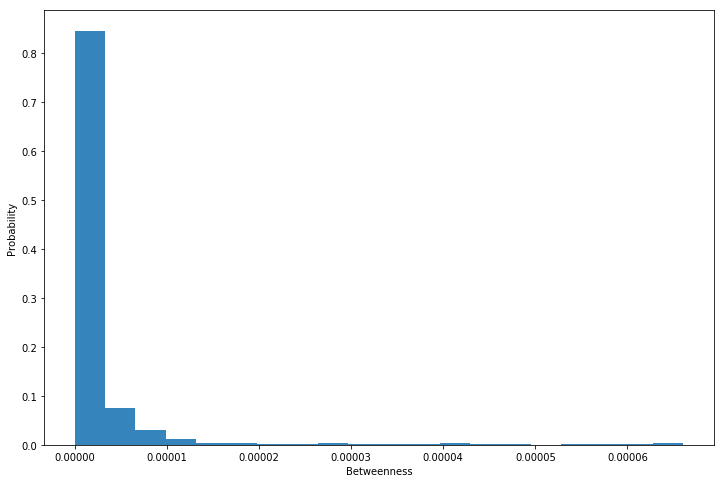

In [18]:
import numpy as np

%matplotlib inline
plt.figure(figsize=(12,8))

# WARNING: make sure you are passing properly the output of the previous exercise
data = list(cb_tran.values())
n, bins, patches  = plt.hist(x = data, bins=20, weights=np.ones(len(data)) / len(data), alpha = 0.9)

plt.xlabel('Betweenness')
plt.ylabel('Probability')

In [ ]:
#sum(n)

### Closeness
<a id='cltran'></a>

From networkx: *Closeness centrality of a node $u$ is the reciprocal of the sum of the shortest path distances from $u$ to all $n-1$ other nodes. Since the sum of distances dependes on the number of nodes in the graph, closeness is normalised by the sum of minimum possible distances $n-1$,* 

$$C_C(u) = \frac{n-1}{\sum_{v=1}^{n-1}d(v,u)}$$
*where $d(v, u)$ is the shortest-path distance between $v$ and $u$, and $n$ is the number of nodes in the graph.*

**Exercise:** Compute the closeness of the graph using the function [closeness_centrality
](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.centrality.closeness_centrality.html) from networkx.

For example,
```python
cc_tran = nx.closeness_centrality(Gtran)
```

In [ ]:
cc_tran = nx.closeness_centrality(Gtran)

Run the code below to visualise the distribution of the closeness centrality for each node.

In [ ]:
import numpy as np

%matplotlib inline
plt.figure(figsize=(12,8))

# WARNING: make sure you are passing properly the output given by the closeness_centrality function
data = list(cc_tran.values())
n, bins, patches  = plt.hist(x = data, bins=30, weights=np.ones(len(data)) / len(data), alpha = 0.9)

plt.xlabel('Closeness')
plt.ylabel('Probability')

In [ ]:
# sum(n)